# Carregamento bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Carregamento e limpeza do dataset

In [2]:
incaData = pd.read_csv(r'E:\IniciacaoCientifica\DeepLearning1st\inca15.csv',low_memory = False)



In [3]:
incaData = incaData.drop(incaData[incaData['estadofinal'] > 8].index)
incaData['idade1'][incaData['idade1'] > 0].mean()
incaData.loc[incaData['idade1'] < 0,'idade1'] = 58
incaData = incaData.drop(incaData[incaData['racacor'] >= 99].index)


### Remapeamento

In [4]:
# Definir um dicionário para mapear os valores a serem substituídos
mapeamento = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 8: 5}

# Aplicar a substituição usando list comprehension
incaData['estadofinal'] = incaData['estadofinal'].replace(mapeamento)

<Axes: title={'center': 'Estado da doença ao final do primeiro tratamento no hospital'}, xlabel='estadofinal', ylabel='count'>

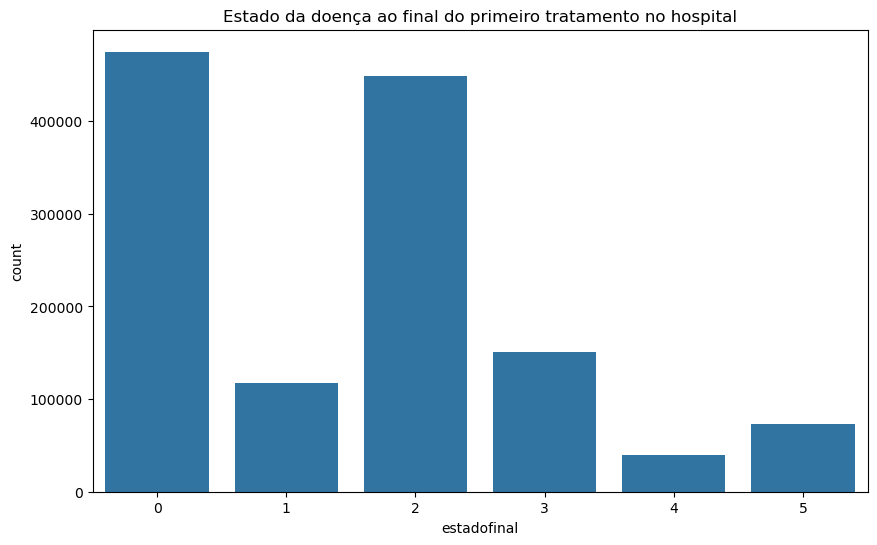

In [5]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Estado da doença ao final do primeiro tratamento no hospital")
sns.countplot(x = incaData['estadofinal'])
#0.Sem evidência da doença (remissão completa); 1.Remissão parcial;2.Doença estável; 3.Doença em progressão; 4.Suporte terapêutico oncológico; 5. Óbito; 6. Não se aplica;

#Pode retirar da base de dados durante o treinamento o valor 9, sem informação?
#Teste feitos sem considerar esse atributo

# Treinamento

## Divisao entre previsores e classe

In [6]:
X = incaData.iloc[:, 0:15].values
X.shape

(1304004, 15)

In [7]:
X

array([[2, 2, 31, ..., 55, '8500', '3 '],
       [2, 4, 15, ..., 41, '8070', '3 '],
       [2, 4, 31, ..., 72, '8140', '3 '],
       ...,
       [2, 4, 31, ..., 57, '8140', '3 '],
       [2, 4, 31, ..., 78, '8480', '3 '],
       [2, 4, 24, ..., 72, '8140', '3 ']], dtype=object)

In [8]:
y = incaData.iloc[:, 15].values
y.shape

(1304004,)

## Tratamento dos atributos Categoricos

## Label encoder

In [9]:
from sklearn.preprocessing import LabelEncoder


In [10]:
label_encoder_loctudet = LabelEncoder()
label_encoder_tnm = LabelEncoder()
label_encoder_estadiam = LabelEncoder()
label_encoder_tipohist1 = LabelEncoder()
label_encoder_tipohist2 = LabelEncoder()

In [11]:
X[:,6] = label_encoder_loctudet.fit_transform(X[:,6])
X[:,7] = label_encoder_tnm.fit_transform(X[:,7])
X[:,8] = label_encoder_estadiam.fit_transform(X[:,8])
X[:,13] = label_encoder_tipohist1.fit_transform(X[:,13])
X[:,14] = label_encoder_tipohist2.fit_transform(X[:,14])

## Escalonamento de valores

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Divisão treino-teste

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train , y_test  = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [20]:
X_train

array([[-1.13561184, -0.38610677,  0.02896082, ..., -0.38442563,
         1.29179254,  0.2214147 ],
       [-1.13561184,  2.61230774,  0.02896082, ...,  1.46205497,
        -0.78698409,  0.2214147 ],
       [ 0.88058258,  0.47058309, -0.06284446, ..., -0.62268119,
        -0.68139543, -3.61378923],
       ...,
       [-1.13561184,  0.47058309,  0.76340306, ...,  0.86641607,
        -0.46361883,  0.2214147 ],
       [ 0.88058258, -0.8144517 ,  0.94701363, ...,  0.68772439,
        -0.54281032,  0.2214147 ],
       [ 0.88058258, -0.8144517 ,  0.02896082, ...,  0.56859661,
        -0.46361883,  0.2214147 ]])

# Teste utilizando SMOTE

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [62]:
smote_X_train, smote_y_train = smote.fit_resample(X_train.astype('float'), y_train)

In [68]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :", Counter(smote_y_train))

Before SMOTE : Counter({0: 427590, 2: 403995, 3: 135361, 1: 105398, 5: 65726, 4: 35533})
After SMOTE : Counter({1: 427590, 0: 427590, 2: 427590, 3: 427590, 5: 427590, 4: 427590})


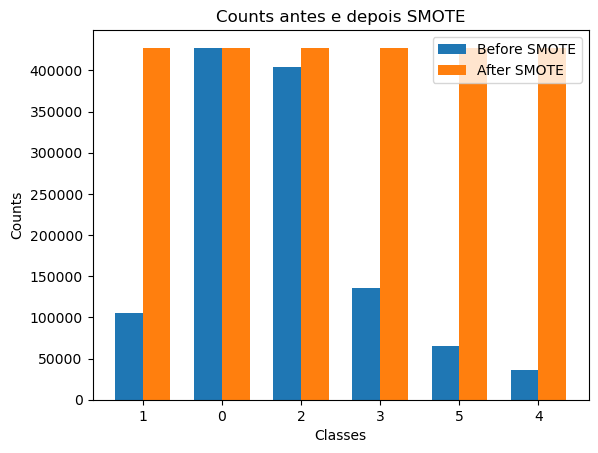

In [75]:
import matplotlib.pyplot as plt
from collections import Counter

# Dados fornecidos
before_smote = Counter(y_train)
after_smote = Counter(smote_y_train)

# Preparar dados para o gráfico
labels = list(before_smote.keys())
before_counts = list(before_smote.values())
after_counts = [after_smote[label] for label in labels]

x = range(len(labels))

# Criar o gráfico de barras
fig, ax = plt.subplots()
bar_width = 0.35

bar1 = ax.bar(x, before_counts, bar_width, label='Before SMOTE')
bar2 = ax.bar([p + bar_width for p in x], after_counts, bar_width, label='After SMOTE')

# Adicionar legendas e títulos
ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Counts antes e depois SMOTE')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Mostrar o gráfico
plt.show()


## Random Forest

### COM SMOTE

In [79]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
Random_Forest.fit(smote_X_train, smote_y_train)
predict = Random_Forest.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     47465
           1       0.44      0.33      0.37     11630
           2       0.65      0.69      0.67     44853
           3       0.43      0.37      0.40     15132
           4       0.44      0.31      0.37      3980
           5       0.75      0.85      0.80      7341

    accuracy                           0.64    130401
   macro avg       0.57      0.55      0.56    130401
weighted avg       0.63      0.64      0.64    130401



In [82]:
accuracy_score(y_test, predict)

0.6439367796259231

### SEM SMOTE

In [83]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
Random_Forest.fit(X_train, y_train)
predict = Random_Forest.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     47465
           1       0.52      0.27      0.35     11630
           2       0.63      0.75      0.68     44853
           3       0.47      0.32      0.38     15132
           4       0.61      0.24      0.34      3980
           5       0.80      0.81      0.81      7341

    accuracy                           0.66    130401
   macro avg       0.63      0.53      0.55    130401
weighted avg       0.64      0.66      0.64    130401



In [84]:
accuracy_score(y_test, predict)

0.6567510985345204

## MLP classifier

### COM SMOTE

In [85]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
MLP.fit(smote_X_train, smote_y_train)
predict =  MLP.predict(X_test)
print(classification_report(y_test,predict))

Iteration 1, loss = 1.39798973
Iteration 2, loss = 1.34087492
Iteration 3, loss = 1.31550883
Iteration 4, loss = 1.30323118
Iteration 5, loss = 1.29653681
Iteration 6, loss = 1.29090301
Iteration 7, loss = 1.28616398
Iteration 8, loss = 1.28244784
Iteration 9, loss = 1.27879732
Iteration 10, loss = 1.27489771
Iteration 11, loss = 1.27197096
Iteration 12, loss = 1.27000130
Iteration 13, loss = 1.26853132
Iteration 14, loss = 1.26755742
Iteration 15, loss = 1.26683147
Iteration 16, loss = 1.26581610
Iteration 17, loss = 1.26467488
Iteration 18, loss = 1.26385710
Iteration 19, loss = 1.26331336
Iteration 20, loss = 1.26298373
Iteration 21, loss = 1.26257426
Iteration 22, loss = 1.26211253
Iteration 23, loss = 1.26166507
Iteration 24, loss = 1.26108074
Iteration 25, loss = 1.26054104
Iteration 26, loss = 1.26010797
Iteration 27, loss = 1.25958537
Iteration 28, loss = 1.25895286
Iteration 29, loss = 1.25851225
Iteration 30, loss = 1.25795678
Iteration 31, loss = 1.25741083
Iteration 32, los

In [86]:
accuracy_score(y_test, predict)

0.4792064478033144

### SEM SMOTE

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
MLP.fit(X_train, y_train)
predict =  MLP.predict(X_test)
print(classification_report(y_test,predict))

In [ ]:
accuracy_score(y_test, predict)

## KNeighborsClassifier

### Com SMOTE

In [87]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(smote_X_train, smote_y_train)
predict = KN.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62     47465
           1       0.19      0.37      0.25     11630
           2       0.59      0.39      0.47     44853
           3       0.27      0.35      0.31     15132
           4       0.12      0.28      0.17      3980
           5       0.60      0.75      0.67      7341

    accuracy                           0.47    130401
   macro avg       0.41      0.45      0.41    130401
weighted avg       0.54      0.47      0.49    130401



In [88]:
accuracy_score(y_test, predict)

0.4651114638691421

### SEM SMOTE

In [89]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
predict = KN.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66     47465
           1       0.26      0.18      0.22     11630
           2       0.55      0.59      0.57     44853
           3       0.36      0.20      0.26     15132
           4       0.29      0.08      0.13      3980
           5       0.78      0.65      0.71      7341

    accuracy                           0.55    130401
   macro avg       0.47      0.41      0.42    130401
weighted avg       0.52      0.55      0.53    130401



In [90]:
accuracy_score(y_test, predict)

0.549581674987155

## Deep Learning

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(15,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(15,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])




c:\Users\Vini\anaconda3\envs\my_IC\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])


### Treino e validação

In [47]:
BATCH_SIZE = 4
EPOCHS = 10

In [49]:
model.fit(smote_X_train, smote_y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 619s 964us/step - accuracy: 0.4639 - loss: 1.3260
Epoch 2/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 614s 957us/step - accuracy: 0.5205 - loss: 1.2209
Epoch 3/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 614s 957us/step - accuracy: 0.5282 - loss: 1.2077
Epoch 4/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 616s 960us/step - accuracy: 0.5295 - loss: 1.2051
Epoch 5/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 616s 960us/step - accuracy: 0.5317 - loss: 1.2011
Epoch 6/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 615s 959us/step - accuracy: 0.5324 - loss: 1.1984
Epoch 7/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 623s 972us/step - accuracy: 0.5315 - loss: 1.1996
Epoch 8/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 613s 956us/step - accuracy: 0.5323 - loss: 1.1985
Epoch 9/10
641385/641385 ━━━━━━━━━━━━━━━━━━━━ 620s 967us/step - accuracy: 0.5320 - loss: 1.1994
Epoch 10/10
230634/641385 ━━━━━━━━━━━━━━━━━━━━ 6:32 956us/step - accuracy: 0.5313 - loss: 1.1991

KeyboardInterrupt: 

In [ ]:
model2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = [np.argmax(v) for v in y_pred]
arquivo = open("saida.txt", "w+")
print(classification_report(y_test,y_pred), file = arquivo)

# Teste utilizando o ADASYN

In [35]:
from imblearn.over_sampling import ADASYN

# Defina o número desejado de amostras para as classes minoritárias

target_count = int(0.8 * 427590) # aumentação em 80% da maior classe

# Ajustar o ADASYN
adasyn = ADASYN(sampling_strategy={1: target_count, 4: target_count, 5: target_count, 3: target_count})
adasyn_X_train, adasyn_y_train = adasyn.fit_resample(X_train.astype('float'), y_train)

# Verificar a nova distribuição das classes após a aplicação do ADASYN
print(Counter(adasyn_y_train))


Counter({0: 427590, 2: 403995, 3: 352130, 1: 350329, 4: 343397, 5: 335685})


In [37]:
Counter(adasyn_y_train)

Counter({0: 427590, 2: 403995, 3: 352130, 1: 350329, 4: 343397, 5: 335685})

In [38]:
Counter(y_train)

Counter({0: 427590, 2: 403995, 3: 135361, 1: 105398, 5: 65726, 4: 35533})

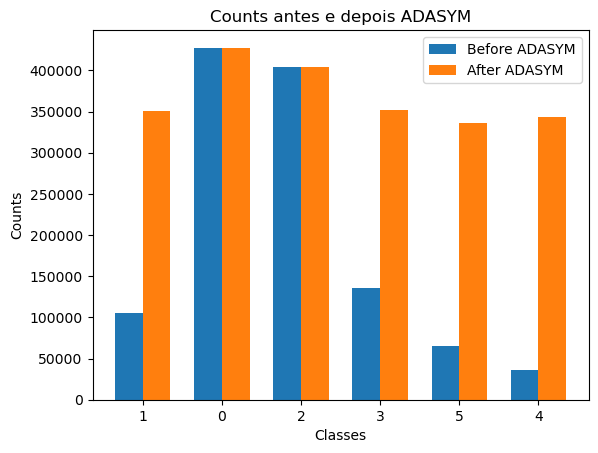

In [42]:
import matplotlib.pyplot as plt
from collections import Counter

# Dados fornecidos
before_smote = Counter(y_train)
after_smote = Counter(adasyn_y_train)

# Preparar dados para o gráfico
labels = list(before_smote.keys())
before_counts = list(before_smote.values())
after_counts = [after_smote[label] for label in labels]

x = range(len(labels))

# Criar o gráfico de barras
fig, ax = plt.subplots()
bar_width = 0.35

bar1 = ax.bar(x, before_counts, bar_width, label='Before ADASYM')
bar2 = ax.bar([p + bar_width for p in x], after_counts, bar_width, label='After ADASYM')

# Adicionar legendas e títulos
ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Counts antes e depois ADASYM')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Mostrar o gráfico
plt.show()


## Random Forest Adasyn

In [44]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest = RandomForestClassifier(n_estimators=80, criterion='entropy', random_state = 0)
Random_Forest.fit(adasyn_X_train, adasyn_y_train)
predict = Random_Forest.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75     47465
           1       0.45      0.32      0.38     11630
           2       0.65      0.70      0.68     44853
           3       0.44      0.37      0.40     15132
           4       0.47      0.32      0.38      3980
           5       0.74      0.87      0.80      7341

    accuracy                           0.65    130401
   macro avg       0.58      0.56      0.56    130401
weighted avg       0.64      0.65      0.64    130401



In [45]:
accuracy_score(y_test, predict)

0.6498416423186939

# Deep learning 

In [ ]:
model = tf.keras.Sequential([
    tf.layers.Input(shape=(15,)),  # Entrada de dimensão 15
    tf.layers.Dense(64, activation='relu'),
    tf.layers.Dense(32, activation='relu'),
    tf.layers.Dense(16, activation='relu'),
    tf.layers.Dense(6, activation='softmax')  # Para classificação multiclasse com 6 classes
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Para problemas de classificação multiclasse
              metrics=['accuracy'])

In [ ]:
model.summary()


In [ ]:
history = model.fit(adasyn_X_train, adasyn_y_train, epochs=50, batch_size=32, validation_split=0.2)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Fazer previsões
predictions = model.predict(X_test)

# Converter previsões para rótulos
predicted_classes = np.argmax(predictions, axis=1)

In [46]:
import pickle

In [47]:
with open('adasyn.pkl', mode = 'wb') as f:
  pickle.dump([adasyn_X_train, adasyn_y_train, X_test, y_test], f)

In [ ]:
with open('adasyn.pkl', 'rb') as f:
  adasyn_X_train, adasyn_y_train, X_test, y_test = pickle.load(f)

In [ ]:
2024-07-12 21:43:51.604212: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 21:43:51.638427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 21:43:52.168638: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-12 21:43:52.793126: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...

In [1]:
import pickle
with open('normal.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

NameError: name 'pickle' is not defined